In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# --- KONFIGURASI ---
# Nama folder tempat file-file json berada (sesuai gambar Anda)
FOLDER_PATH = 'Indonesian news corpus/json' 

def load_dataset_from_folder(folder_path):
    all_files = glob.glob(os.path.join(folder_path, "export-json-*"))
    print(f"Ditemukan {len(all_files)} file di dalam folder '{folder_path}'.")
    
    data_frames = []
    
    for filename in sorted(all_files):
        try:
            # Membaca file JSON. Karena tidak ada ekstensi .json, kita paksa pandas membacanya
            # Biasanya formatnya adalah JSON Array standar [...]
            df_temp = pd.read_json(filename)
            data_frames.append(df_temp)
        except ValueError:
            try:
                # Opsi cadangan jika formatnya JSON Lines (per baris)
                df_temp = pd.read_json(filename, lines=True)
                data_frames.append(df_temp)
            except Exception as e:
                print(f"Gagal membaca {filename}: {e}")
                continue
                
    if not data_frames:
        print("Gagal memuat data. Pastikan path folder benar.")
        return None
        
    # Gabungkan semua pecahan file menjadi satu DataFrame besar
    full_df = pd.concat(data_frames, ignore_index=True)
    return full_df

# Eksekusi Loading
print("Sedang memproses data (Mungkin memakan waktu beberapa saat)...")
df = load_dataset_from_folder(FOLDER_PATH)

if df is not None:
    print("-" * 30)
    print(f"SUKSES! Total artikel dimuat: {len(df)}")
    print("-" * 30)
    print("Contoh Data:")
    display(df.head())

Sedang memproses data (Mungkin memakan waktu beberapa saat)...
Ditemukan 184 file di dalam folder 'Indonesian news corpus/Indonesian news corpus/json'.
------------------------------
SUKSES! Total artikel dimuat: 150466
------------------------------
Contoh Data:


,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [5]:
# 1. Standarisasi Teks
df['kategori'] = df['kategori'].str.title().str.strip() # Jadikan Title Case
df['sumber'] = df['sumber'].str.lower().str.strip()     # Jadikan huruf kecil

# 2. Cek Missing Values
print("Jumlah Data Kosong:")
print(df.isnull().sum())

# 3. Hapus Duplikat (Berdasarkan Isi Berita)
# Berita yang isinya sama persis dianggap duplikat
initial_count = len(df)
df = df.drop_duplicates(subset=['isi'])
print(f"\nMenghapus {initial_count - len(df)} data duplikat.")
print(f"Total data bersih: {len(df)}")

# 4. Tampilkan Daftar Kategori
print("\nKategori yang tersedia:")
print(df['kategori'].unique())

Jumlah Data Kosong:
sumber        0
tanggal       0
kategori      0
judul         0
isi           0
link          0
jumlahkata    0
dtype: int64

Menghapus 175 data duplikat.
Total data bersih: 150291

Kategori yang tersedia:
['Teknologi' 'Bisnis Ekonomi' 'Nasional' 'Olahraga' 'Travel' 'Bola'
 'Lifestyle' 'Otomotif']


C:\Users\rihsa\AppData\Local\Temp\ipykernel_11608\1748121057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='kategori', data=df, order=order, palette='viridis')


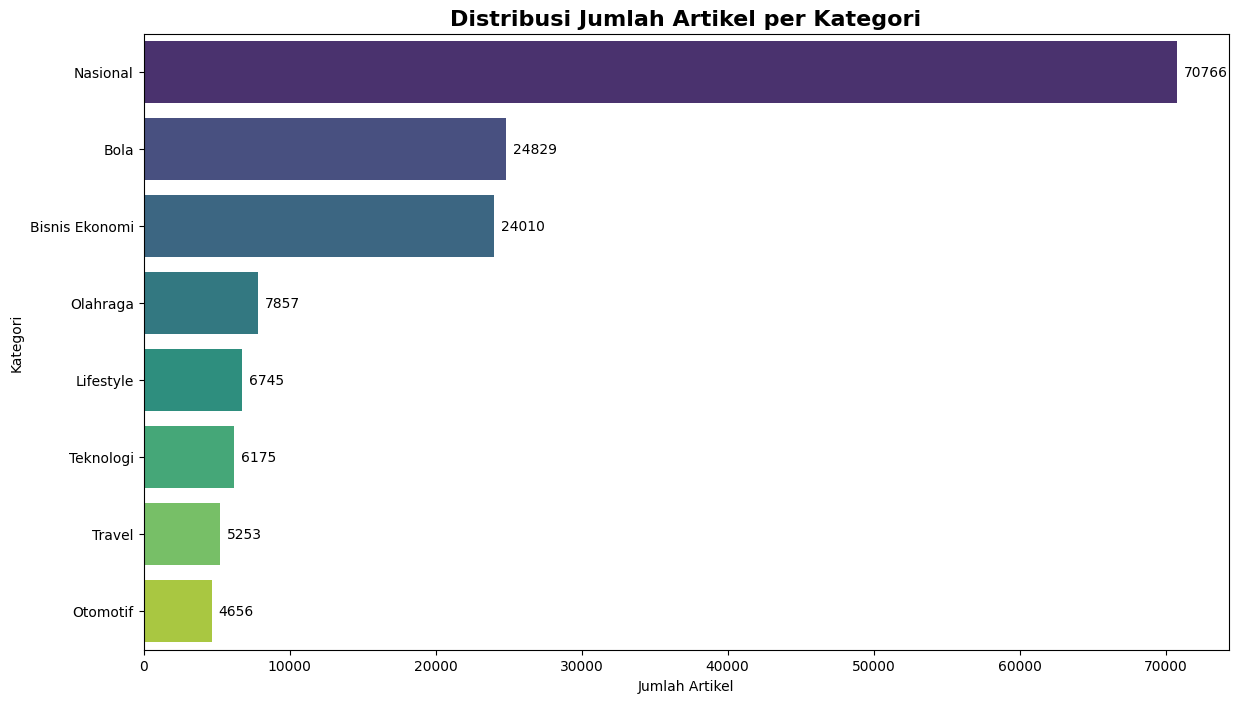

In [6]:
plt.figure(figsize=(14, 8))

# Hitung jumlah artikel per kategori
order = df['kategori'].value_counts().index
ax = sns.countplot(y='kategori', data=df, order=order, palette='viridis')

# Tampilkan angka di ujung batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points')

plt.title('Distribusi Jumlah Artikel per Kategori', fontsize=16, weight='bold')
plt.xlabel('Jumlah Artikel')
plt.ylabel('Kategori')
plt.show()

C:\Users\rihsa\AppData\Local\Temp\ipykernel_11608\1268136662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sumber', data=df, palette='Spectral', order=df['sumber'].value_counts().index)


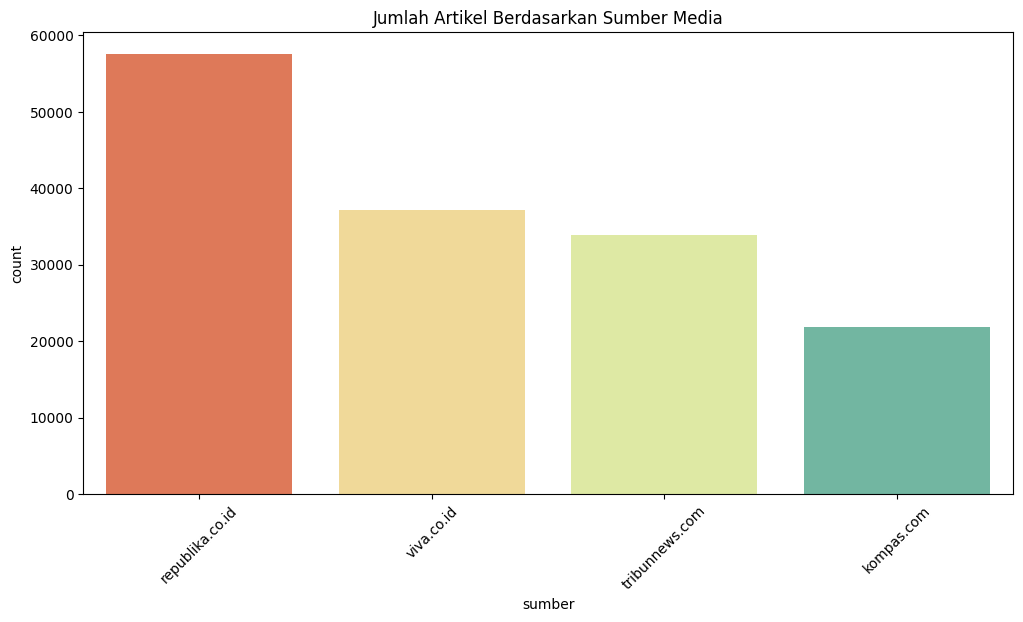

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sumber', data=df, palette='Spectral', order=df['sumber'].value_counts().index)
plt.title('Jumlah Artikel Berdasarkan Sumber Media')
plt.xticks(rotation=45)
plt.show()

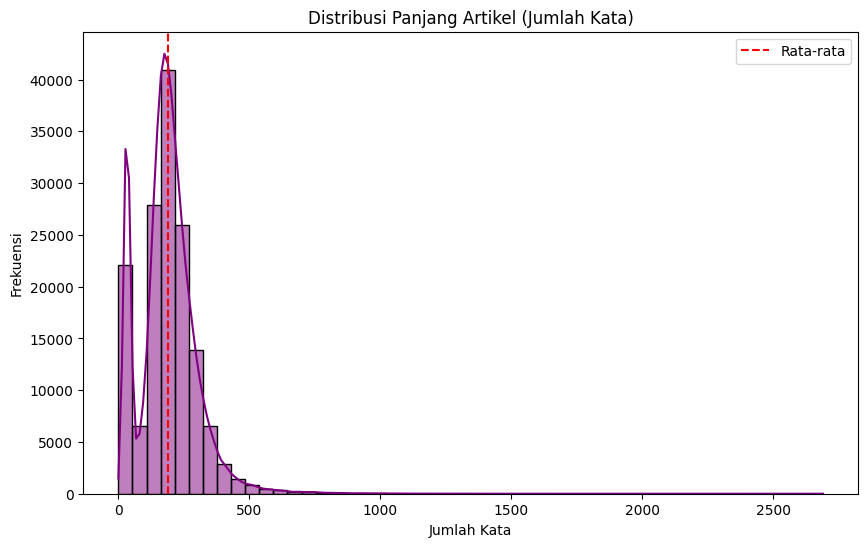

Rata-rata panjang artikel: 191 kata
Artikel terpendek: 1 kata
Artikel terpanjang: 2690 kata


In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['jumlahkata'], bins=50, kde=True, color='purple')
plt.title('Distribusi Panjang Artikel (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.axvline(df['jumlahkata'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()
plt.show()

print(f"Rata-rata panjang artikel: {df['jumlahkata'].mean():.0f} kata")
print(f"Artikel terpendek: {df['jumlahkata'].min()} kata")
print(f"Artikel terpanjang: {df['jumlahkata'].max()} kata")